## Importing data

In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit import DataStructs
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from rdkit.Chem.Fragments import *

df = pd.read_excel("Youngs_modulus_dataset.xlsx")

df_smiles=df['Smiles'].dropna(how='any')
cols=[
    "1. aliphatic carboxylic acids",
    "2. aliphatic hydroxyl groups",
    "3. aliphatic hydroxyl groups excluding tert-OH",
    "4. N functional groups attached to aromatics",
    "5. Aromatic carboxylic acide",
    "6. aromatic nitrogens",
    "7. aromatic amines",
    "8. aromatic hydroxyl groups",
    "9. carboxylic acids",
    "10. carboxylic acids",
    "11. carbonyl O",
    "12. carbonyl O, excluding COOH",
    "13. thiocarbonyl",
    "14. C(OH)CCN-Ctert-alkyl or C(OH)CCNcyclicC(OH)CCN-Ctert-alkyl or C(OH)CCNcyclic",
    "15. Imines",
    "16. Tertiary amines",
    "17. Secondary amines",
    "18. Primary amines",
    "19. hydroxylamine groups",
    "20. XCCNR groups",
    "21. tert-alicyclic amines (no heteroatoms,not quinine-like bridged N)",
    "22. H-pyrrole nitrogens",
    "23. thiol groups",
    "24. aldehydes",
    "25. alkyl carbamates (subject to hydrolysis)",
    "26. alkyl halides",
    "27. allylic oxidation sites excluding steroid dienone",
    "28. amides",
    "29. amidine groups",
    "30. anilines",
    "31. aryl methyl sites for hydroxylation",
    "32. azide groups",
    "33. azo groups",
    "34. barbiturate groups",
    "35. benzene rings",
    "36. benzodiazepines with no additional fused rings",
    "37. Bicyclic",
    "38. diazo groups",
    "39. dihydropyridines",
    "40. epoxide rings",
    "41. esters",
    "42. ether oxygens (including phenoxy)",
    "43. furan rings",
    "44. guanidine groups",
    "45. halogens",
    "46. hydrazine groups",
    "47. hydrazone groups",
    "48. imidazole rings",
    "49. imide groups",
    "50. isocyanates",
    "51. isothiocyanates",
    "52. ketones",
    "53. ketones excluding diaryl, a,b-unsat. dienones, heteroatom on Calpha",
    "54. beta lactams",
    "55. cyclic esters (lactones)",
    "56. methoxy groups -OCH3",
    "57. morpholine rings",
    "58. nitriles",
    "59. nitro groups",
    "60. nitro benzene ring substituents",
    "61. non-ortho nitro benzene ring substituents",
    "62. nitroso groups, excluding NO2",
    "63. oxazole rings",
    "64. oxime groups",
    "65. para-hydroxylation sites",
    "66. phenols",
    "67. phenolic OH excluding ortho intramolecular Hbond substituents",
    "68. phosphoric acid groups",
    "69. phosphoric ester groups",
    "70. piperdine rings",
    "71. piperzine rings",
    "72. primary amides",
    "73. primary sulfonamides",
    "74. pyridine rings",
    "75. quarternary nitrogens",
    "76. thioether",
    "77. sulfonamides",
    "78. sulfone groups",
    "79. terminal acetylenes",
    "80. tetrazole rings",
    "81. thiazole rings",
    "82. thiocyanates",
    "83. thiophene rings",
    "84. unbranched alkanes of at least 4 members (excludes halogenated alkanes)",
    "85. urea groups"
]
df_nfrag=pd.DataFrame(np.arange(len(df_smiles)*85).reshape(len(df_smiles),85),columns=cols)

for m in range(len(df_smiles)):
    molecule=Chem.MolFromSmiles(df_smiles[m])
    df_nfrag.iloc[m,0]=fr_Al_COO(molecule)
    df_nfrag.iloc[m,1]=fr_Al_OH(molecule)
    df_nfrag.iloc[m,2]=fr_Al_OH_noTert(molecule)
    df_nfrag.iloc[m,3]=fr_ArN(molecule)
    df_nfrag.iloc[m,4]=fr_Ar_COO(molecule)
    df_nfrag.iloc[m,5]=fr_Ar_N(molecule)
    df_nfrag.iloc[m,6]=fr_Ar_NH(molecule)
    df_nfrag.iloc[m,7]=fr_Ar_OH(molecule)
    df_nfrag.iloc[m,8]=fr_COO(molecule)
    df_nfrag.iloc[m,9]=fr_COO2(molecule)
    df_nfrag.iloc[m,10]=fr_C_O(molecule)
    df_nfrag.iloc[m,11]=fr_C_O_noCOO(molecule)
    df_nfrag.iloc[m,12]=fr_C_S(molecule)
    df_nfrag.iloc[m,13]=fr_HOCCN(molecule)
    df_nfrag.iloc[m,14]=fr_Imine(molecule)
    df_nfrag.iloc[m,15]=fr_NH0(molecule)
    df_nfrag.iloc[m,16]=fr_NH1(molecule)
    df_nfrag.iloc[m,17]=fr_NH2(molecule)
    df_nfrag.iloc[m,18]=fr_N_O(molecule)
    df_nfrag.iloc[m,19]=fr_Ndealkylation1(molecule)
    df_nfrag.iloc[m,20]=fr_Ndealkylation2(molecule)
    df_nfrag.iloc[m,21]=fr_Nhpyrrole(molecule)
    df_nfrag.iloc[m,22]=fr_SH(molecule)
    df_nfrag.iloc[m,23]=fr_aldehyde(molecule)
    df_nfrag.iloc[m,24]=fr_alkyl_carbamate(molecule)
    df_nfrag.iloc[m,25]=fr_alkyl_halide(molecule)
    df_nfrag.iloc[m,26]=fr_allylic_oxid(molecule)
    df_nfrag.iloc[m,27]=fr_amide(molecule)
    df_nfrag.iloc[m,28]=fr_amidine(molecule)
    df_nfrag.iloc[m,29]=fr_aniline(molecule)
    df_nfrag.iloc[m,30]=fr_aryl_methyl(molecule)
    df_nfrag.iloc[m,31]=fr_azide(molecule)
    df_nfrag.iloc[m,32]=fr_azo(molecule)
    df_nfrag.iloc[m,33]=fr_barbitur(molecule)
    df_nfrag.iloc[m,34]=fr_benzene(molecule)
    df_nfrag.iloc[m,35]=fr_benzodiazepine(molecule)
    df_nfrag.iloc[m,36]=fr_bicyclic(molecule)
    df_nfrag.iloc[m,37]=fr_diazo(molecule)
    df_nfrag.iloc[m,38]=fr_dihydropyridine(molecule)
    df_nfrag.iloc[m,39]=fr_epoxide(molecule)
    df_nfrag.iloc[m,40]=fr_ester(molecule)
    df_nfrag.iloc[m,41]=fr_ether(molecule)
    df_nfrag.iloc[m,42]=fr_furan(molecule)
    df_nfrag.iloc[m,43]=fr_guanido(molecule)
    df_nfrag.iloc[m,44]=fr_halogen(molecule)
    df_nfrag.iloc[m,45]=fr_hdrzine(molecule)
    df_nfrag.iloc[m,46]=fr_hdrzone(molecule)
    df_nfrag.iloc[m,47]=fr_imidazole(molecule)
    df_nfrag.iloc[m,48]=fr_imide(molecule)
    df_nfrag.iloc[m,49]=fr_isocyan(molecule)
    df_nfrag.iloc[m,50]=fr_isothiocyan(molecule)
    df_nfrag.iloc[m,51]=fr_ketone(molecule)
    df_nfrag.iloc[m,52]=fr_ketone_Topliss(molecule)
    df_nfrag.iloc[m,53]=fr_lactam(molecule)
    df_nfrag.iloc[m,54]=fr_lactone(molecule)
    df_nfrag.iloc[m,55]=fr_methoxy(molecule)
    df_nfrag.iloc[m,56]=fr_morpholine(molecule)
    df_nfrag.iloc[m,57]=fr_nitrile(molecule)
    df_nfrag.iloc[m,58]=fr_nitro(molecule)
    df_nfrag.iloc[m,59]=fr_nitro_arom(molecule)
    df_nfrag.iloc[m,60]=fr_nitro_arom_nonortho(molecule)
    df_nfrag.iloc[m,61]=fr_nitroso(molecule)
    df_nfrag.iloc[m,62]=fr_oxazole(molecule)
    df_nfrag.iloc[m,63]=fr_oxime(molecule)
    df_nfrag.iloc[m,64]=fr_para_hydroxylation(molecule)
    df_nfrag.iloc[m,65]=fr_phenol(molecule)
    df_nfrag.iloc[m,66]=fr_phenol_noOrthoHbond(molecule)
    df_nfrag.iloc[m,67]=fr_phos_acid(molecule)
    df_nfrag.iloc[m,68]=fr_phos_ester(molecule)
    df_nfrag.iloc[m,69]=fr_piperdine(molecule)
    df_nfrag.iloc[m,70]=fr_piperzine(molecule)
    df_nfrag.iloc[m,71]=fr_priamide(molecule)
    df_nfrag.iloc[m,72]=fr_prisulfonamd(molecule)
    df_nfrag.iloc[m,73]=fr_pyridine(molecule)
    df_nfrag.iloc[m,74]=fr_quatN(molecule)
    df_nfrag.iloc[m,75]=fr_sulfide(molecule)
    df_nfrag.iloc[m,76]=fr_sulfonamd(molecule)
    df_nfrag.iloc[m,77]=fr_sulfone(molecule)
    df_nfrag.iloc[m,78]=fr_term_acetylene(molecule)
    df_nfrag.iloc[m,79]=fr_tetrazole(molecule)
    df_nfrag.iloc[m,80]=fr_thiazole(molecule)
    df_nfrag.iloc[m,81]=fr_thiocyan(molecule)
    df_nfrag.iloc[m,82]=fr_thiophene(molecule)
    df_nfrag.iloc[m,83]=fr_unbrch_alkane(molecule)
    df_nfrag.iloc[m,84]=fr_urea(molecule)

# Preparation for analysis
df_smiles=pd.DataFrame(df_smiles)

In [2]:
# Calculation of the correlation matrix
import seaborn as sns

# Removing variables with high correlation among explanatory variables
# List of eliminated target column
columns_to_drop = ["1. aliphatic carboxylic acids", 
                   "10. carboxylic acids", 
                   "3. aliphatic hydroxyl groups excluding tert-OH",
                   "66. phenols",
                   "67. phenolic OH excluding ortho intramolecular Hbond substituents",
                   "22. H-pyrrole nitrogens",
                   "4. N functional groups attached to aromatics",
                   "17. Secondary amines",
                   "46. hydrazine groups",
                   "61. non-ortho nitro benzene ring substituents",
                   "12. carbonyl O, excluding COOH",
                   "39. dihydropyridines",
                   "42. ether oxygens (including phenoxy)",
                   "53. ketones excluding diaryl, a,b-unsat. dienones, heteroatom on Calpha",]

# Deletion of specific columns
df_nfrag_nocorr = df_nfrag.drop(columns=columns_to_drop)

# Deletion of columns containing only zeros
df_nfrag_reduced = df_nfrag_nocorr.loc[:, (df_nfrag_nocorr != 0).any(axis=0)]
print(df_nfrag_reduced.shape)
corr_matrix = df_nfrag_reduced.corr()

(393, 45)


## Calculate the correlation coefficient of variables

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt

# Copy generation of df_nfrag_reduced
df_analysis_copy = df_nfrag_reduced.copy()

# Functional group names
original_cols = df_analysis_copy.columns

# Creating shortened names F1, F2, ..., Fn
short_cols = [f'F{i+1}' for i in range(len(original_cols))]

# Replacement of functional group names with abbreviations
df_analysis_copy.columns = short_cols
func_group_mapping = pd.DataFrame({'Short Name': short_cols, 'Functional Group': original_cols})
print("Functional Group Mapping")
display(func_group_mapping)

Functional Group Mapping


,Short Name,Functional Group
0,F1,2. aliphatic hydroxyl groups
1,F2,5. Aromatic carboxylic acide
2,F3,6. aromatic nitrogens
3,F4,7. aromatic amines
4,F5,8. aromatic hydroxyl groups
5,F6,9. carboxylic acids
6,F7,11. carbonyl O
7,F8,15. Imines
8,F9,16. Tertiary amines
9,F10,18. Primary amines


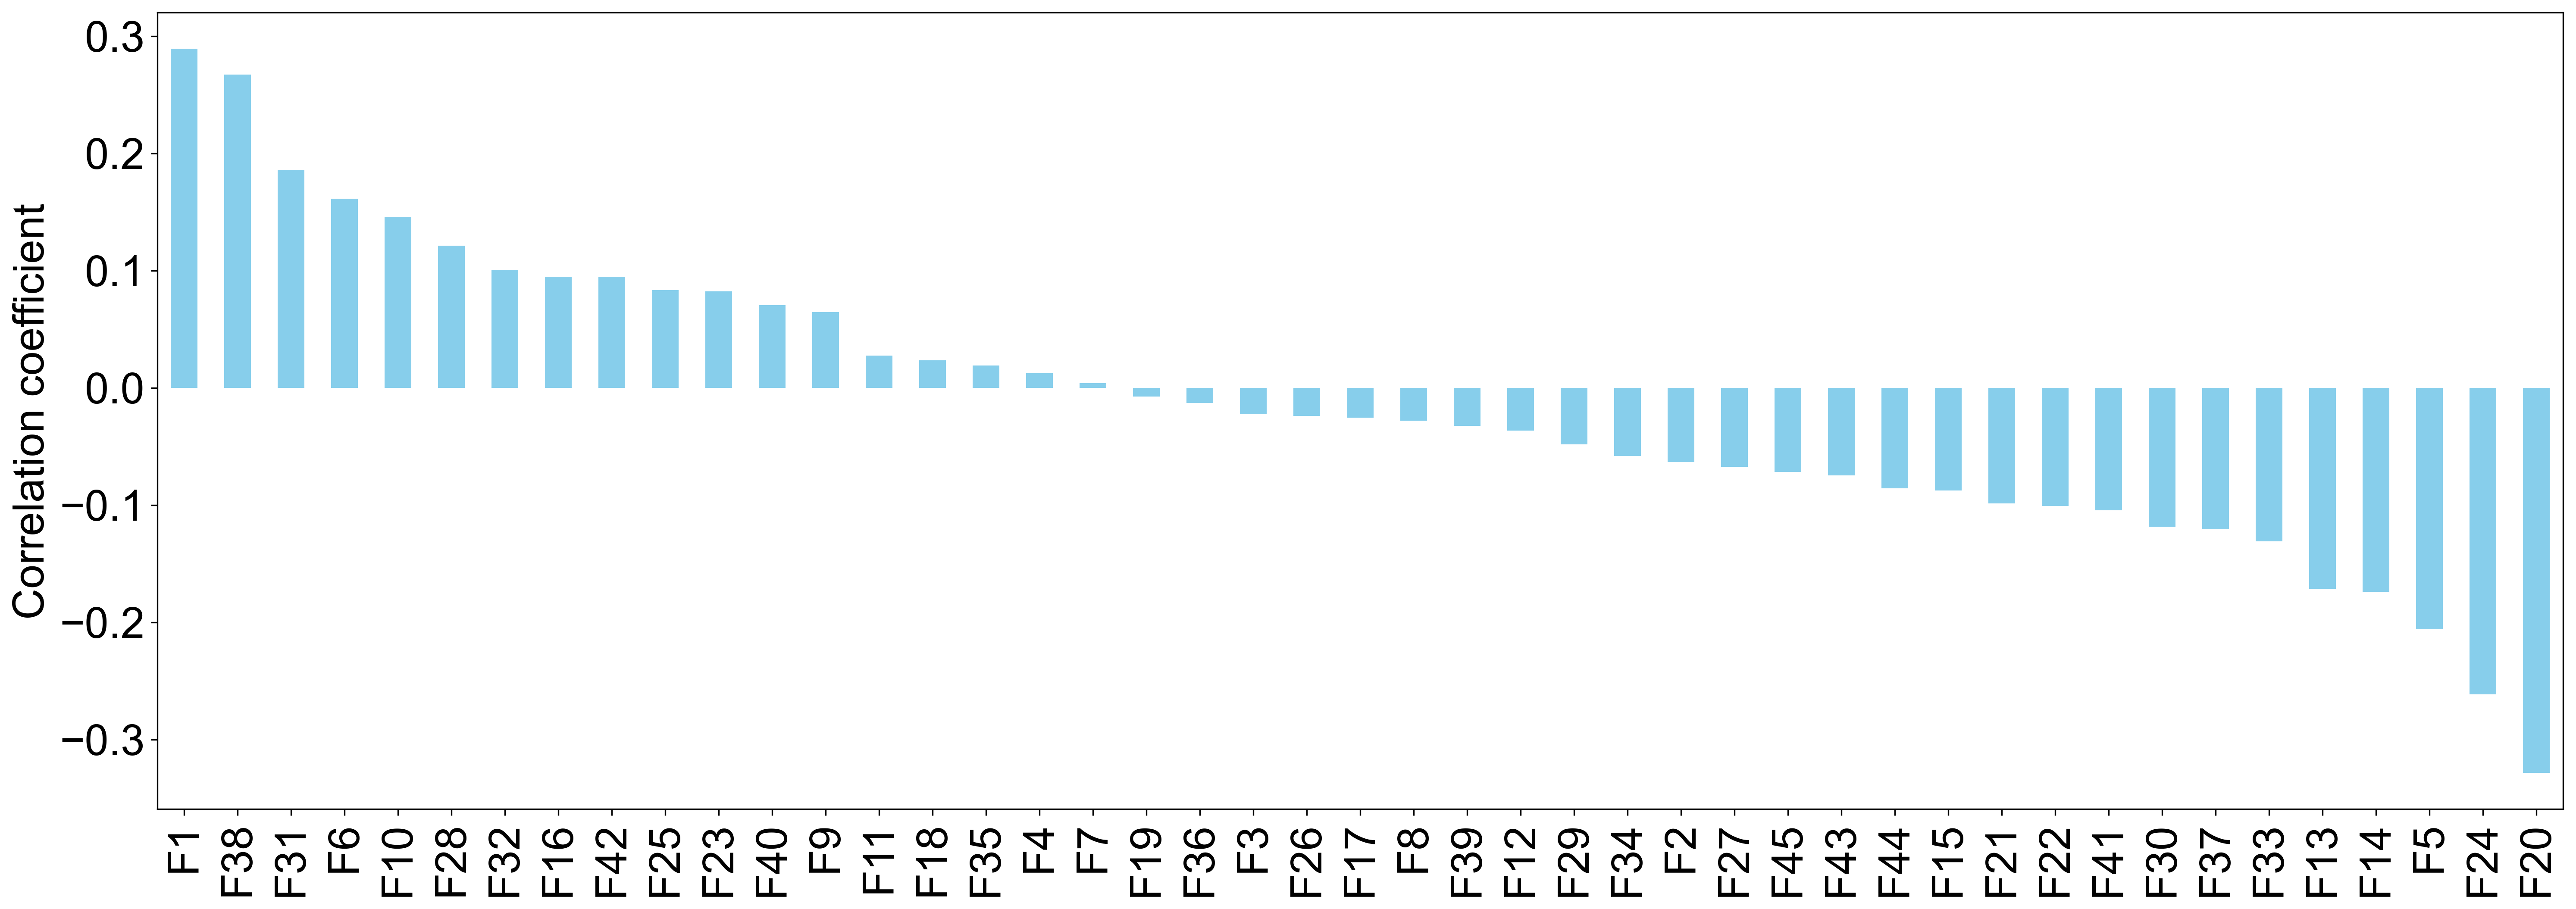

In [4]:
def vector_matrix_correlation(vector, matrix):
    # Convert input to numpy arrays
    vector = np.array(vector)
    matrix = np.array(matrix)
    
    # Check dimensions to ensure compatibility
    if vector.shape[0] != matrix.shape[0]:
        raise ValueError("The length of the vector must match the number of rows in the matrix.")
    
    # Calculate the correlation coefficient for each column
    correlations = [np.corrcoef(vector, matrix[:, i])[0, 1] for i in range(matrix.shape[1])]
    
    return correlations

# Calculation of correlation coefficients for the vector and each matrix column
correlation_values = vector_matrix_correlation(df['E (Gpa)'], df_nfrag_reduced.values)
correlation_with_E = pd.Series(correlation_values, index=short_cols).sort_values(ascending=False)

# Bar chart generation
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 8),dpi=300)
plt.rcParams['font.size'] = 24
plt.rcParams['font.family'] = 'Arial'
correlation_with_E.plot(kind='bar', color='skyblue')

# Setting of titles and labels
plt.ylabel("Correlation coefficient")
# plt.xlabel("Functional groups (Short name)")
plt.xticks(rotation=90)  # 横軸のラベルを90度に表示

# Showing graph
plt.show()

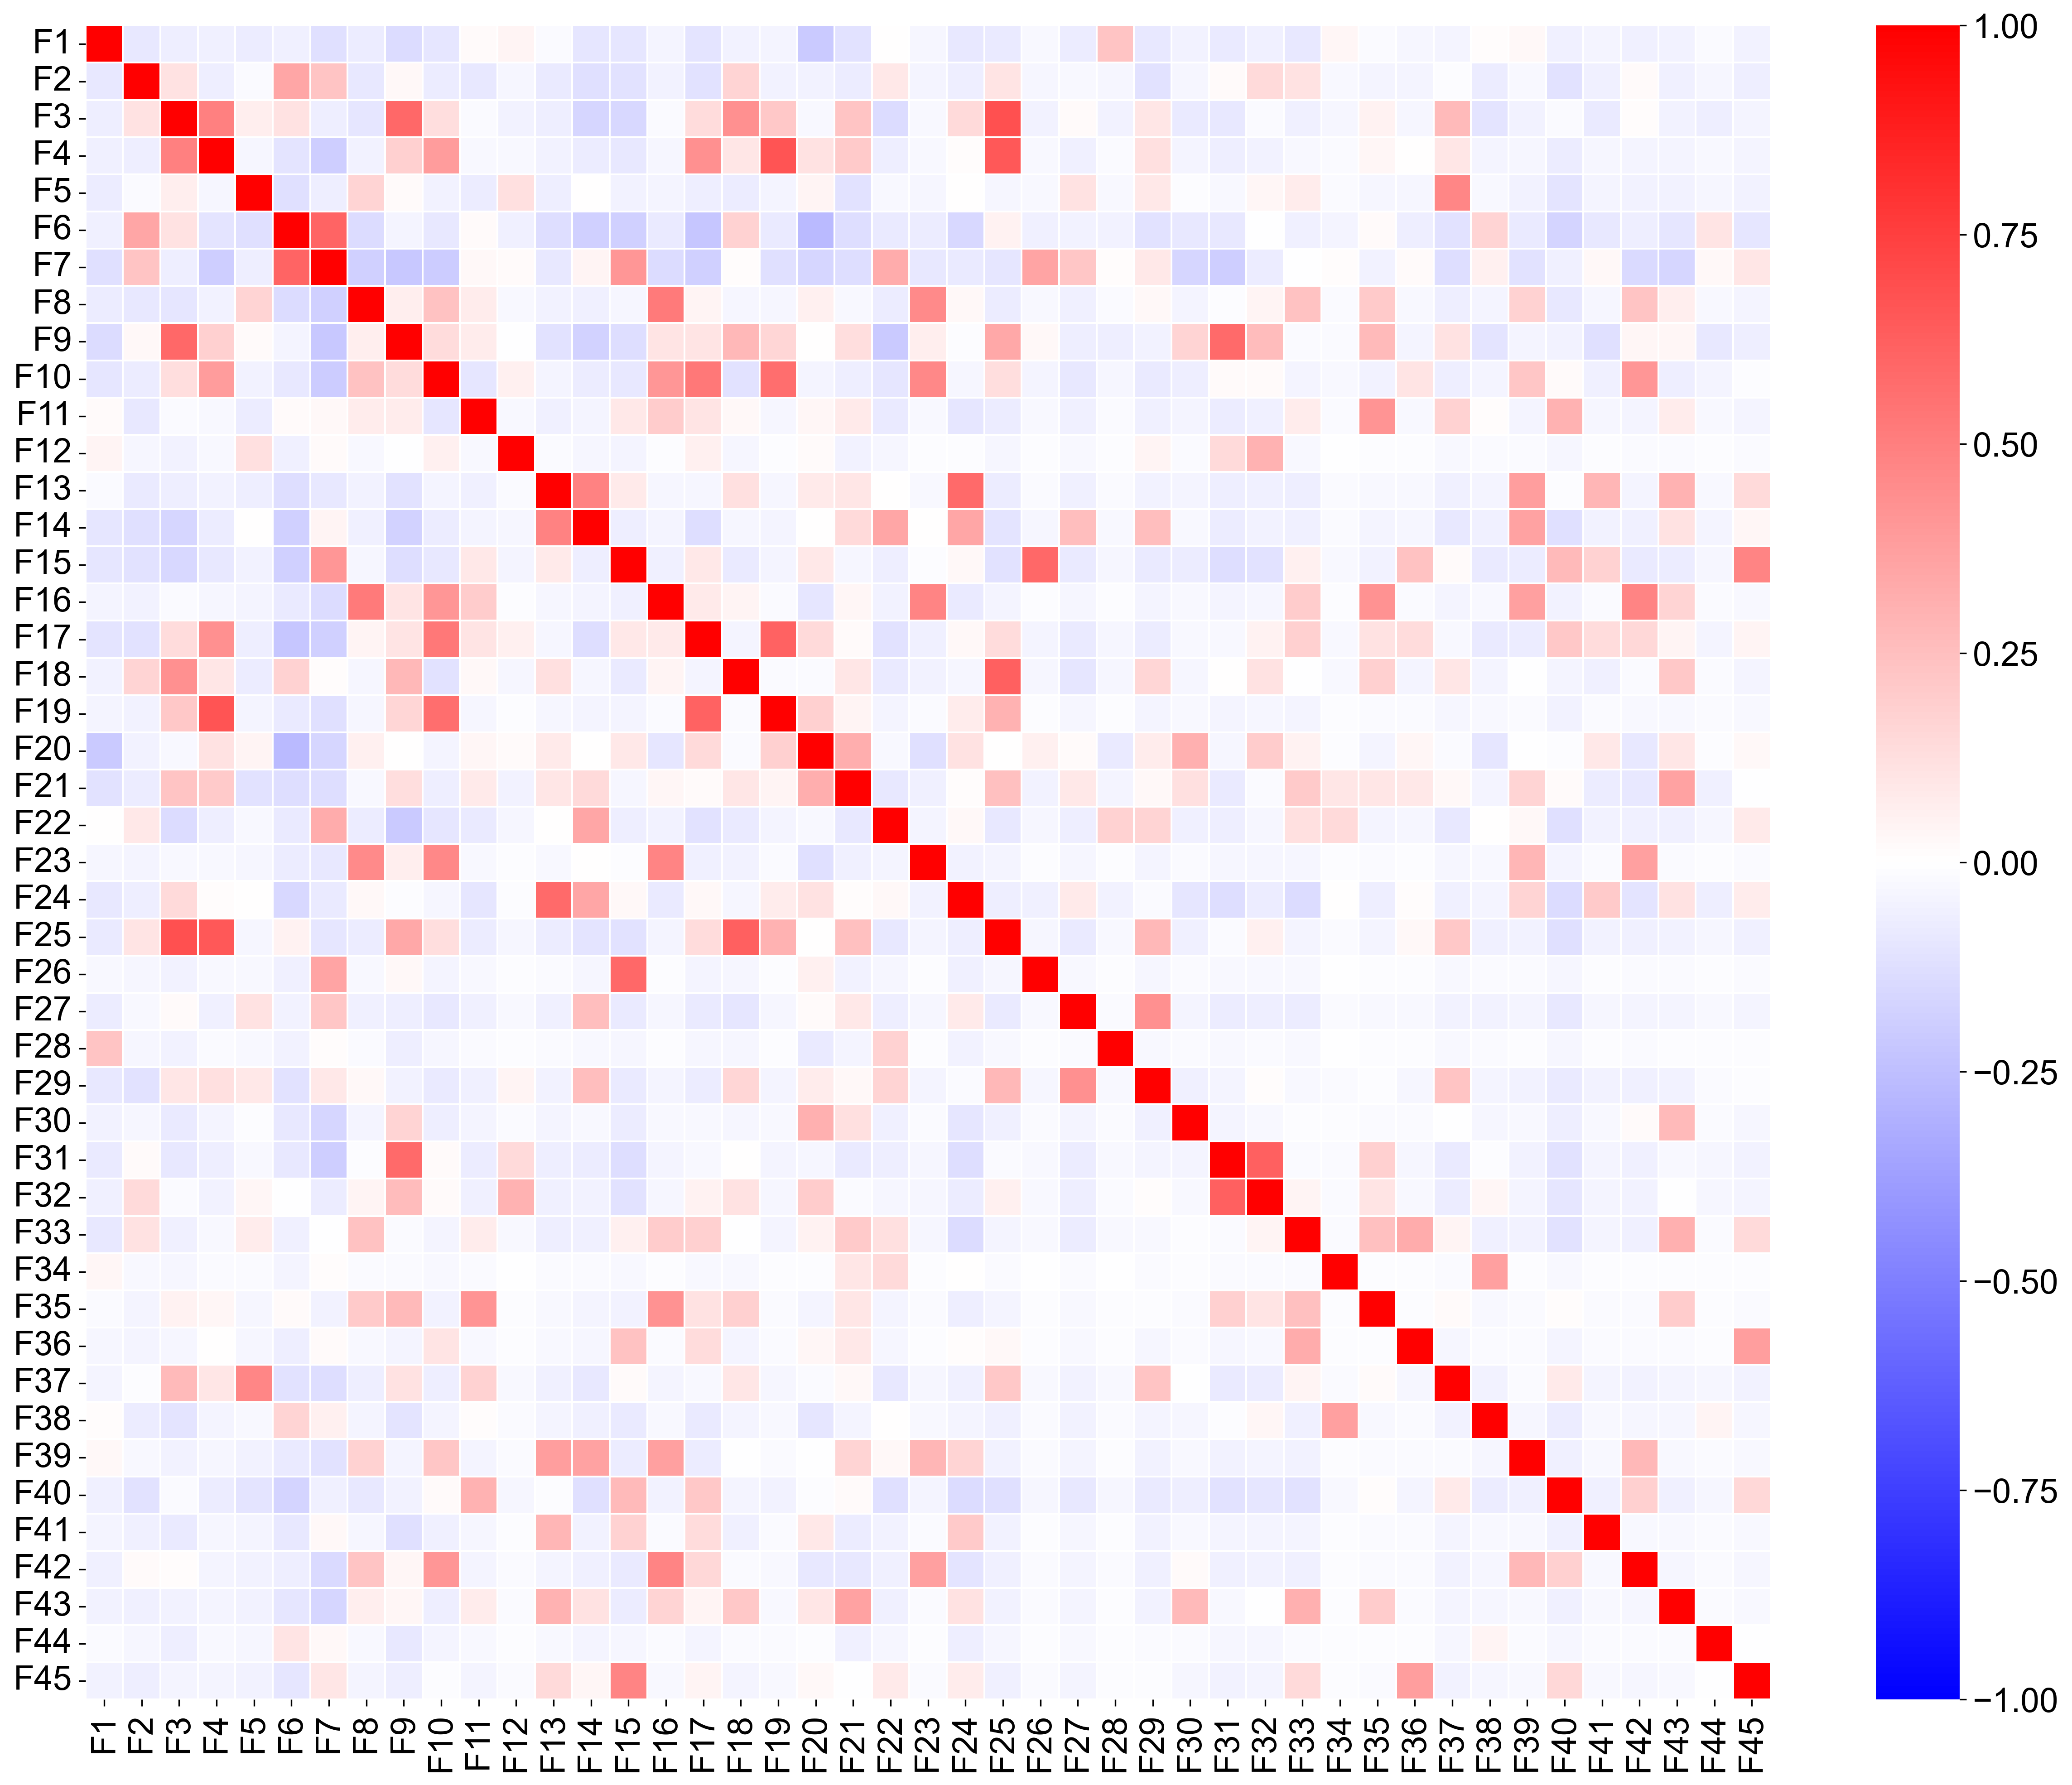

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Creation of a copy of df_nfrag_reduced
df_analysis_copy = df_nfrag_reduced.copy()

# Functional group names
original_cols = df_analysis_copy.columns

# Creation of short names as F1, F2, ..., Fn
short_cols = [f'F{i+1}' for i in range(len(original_cols))]

# Creation of a correlation matrix with indices and column names 
corr_matrix = df_analysis_copy.corr()
corr_matrix.columns = short_cols
corr_matrix.index = short_cols

# Creation of a heatmap
plt.figure(figsize=(20, 16),dpi=300)
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = "Arial"
sns.heatmap(corr_matrix, cmap='bwr', linewidths=0.5, vmax=1, vmin=-1)
plt.xticks(rotation=90)  # 横軸のラベルを90度に表示
plt.show()

## Describing dataset

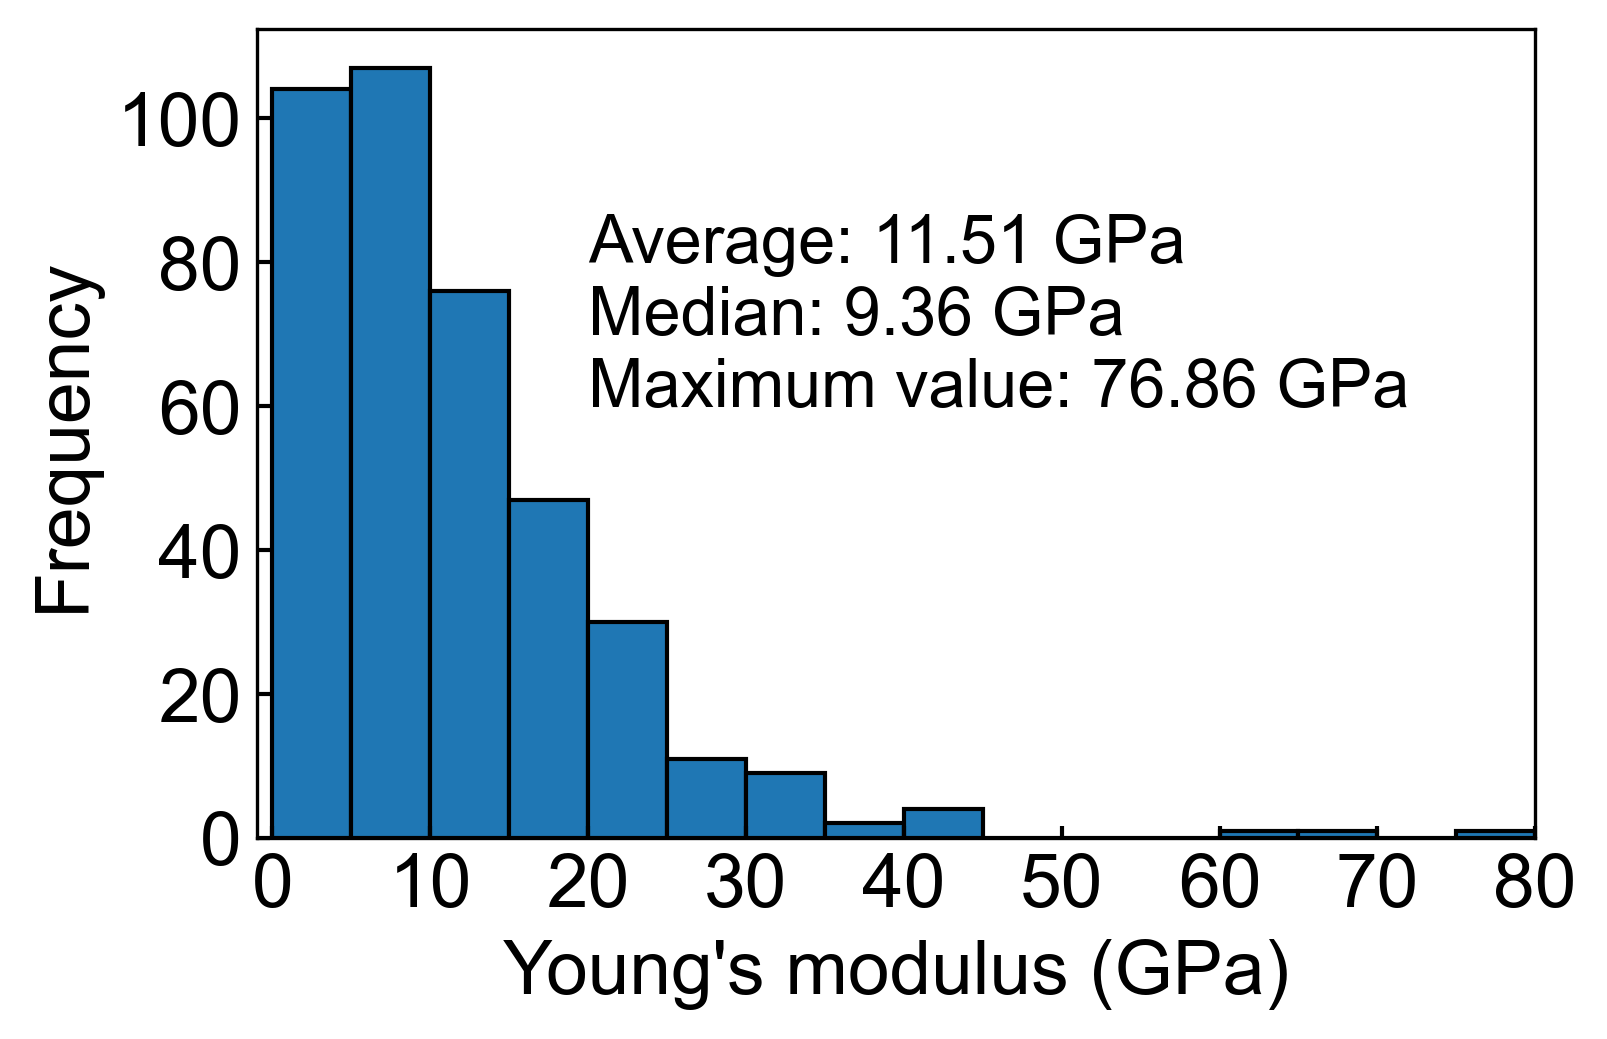

In [6]:
# Histogram of Young's modulus
y = df['E (Gpa)']
plt.figure(figsize=(5.5,3.5),dpi=300)
plt.rcParams['font.size']=18
plt.rcParams["xtick.direction"] = "in"               
plt.rcParams["ytick.direction"] = "in" 
plt.hist(y,bins=[i*5 for i in range(17)],ec='black')
plt.xlabel('Young\'s modulus (GPa)',fontname="Arial")
plt.ylabel('Frequency',fontname="Arial")
plt.xlim(-1,80)

# Plotting of mean and median values
plt.text(20, 80, f'Average: {np.mean(y):.2f} GPa', color='black', fontsize=16,fontname="Arial")
plt.text(20, 70, f'Median: {np.median(y):.2f} GPa', color='black', fontsize=16,fontname="Arial")
plt.text(20, 60, f'Maximum value: {np.max(y):.2f} GPa', color='black', fontsize=16,fontname="Arial")

plt.tick_params(width=1, length = 3)
plt.xticks([i*10 for i in range(9)])
plt.yticks([i*20 for i in range(6)])
plt.show()

## LASSO regression

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.simplefilter('ignore')

# Dataset generation
X = df_nfrag_reduced
y = df['E (Gpa)']

# Splitting of data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cross-validation configuration
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Candidate values of alpha for evaluation
alphas = np.logspace(-4, 1, 50)
# alphas = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1])

# Cross-validation results for each alpha
alpha_error_scores = []
alpha_n_coef_scores = []

# Exploration of the optimal alpha 
for alpha in alphas:
    error_scores = []
    n_coef_scores = []
    
    # 5-fold cross validation
    for train_index, val_index in kf.split(X_train):
        X_kf_train, X_kf_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_kf_train, y_kf_val = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Training of the Lasso regression
        lasso = Lasso(alpha=alpha, max_iter=5000)
        lasso.fit(X_kf_train, y_kf_train)
        
        # Prediction on the validation dataset
        y_kf_pred = lasso.predict(X_kf_val)
        
        # Calculation and recording of MSE
        error = mean_squared_error(y_kf_val, y_kf_pred)
        coefs = lasso.coef_
        non_zero_coefs = coefs[coefs != 0].shape[0]
        coef_error = np.sqrt((non_zero_coefs-8)**2)
        error_scores.append(error*coef_error)
        n_coef_scores.append(non_zero_coefs)
    
    # Calculation and storage of the average MSE for each alpha
    alpha_error_scores.append(np.mean(error_scores))
    alpha_n_coef_scores.append(np.mean(n_coef_scores))

# Selection of the optimal alpha
optimal_alpha = alphas[np.argmin(alpha_error_scores)]
print(f'Optimal alpha: {optimal_alpha}')

# Training of the model with the selected optimal alpha
lasso_optimal = Lasso(alpha=optimal_alpha)
lasso_optimal.fit(X_train, y_train)

# Prediction on the test dataset
y_pred_train = lasso_optimal.predict(X_train)
y_pred = lasso_optimal.predict(X_test)

# Display of the test set MSE
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error on Train Set: {mse_train}')

mae_train = mean_absolute_error(y_train, y_pred_train)
print(f'Mean Absolute Error on Train Set: {mae_train}')

mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse_test}')

mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mae_test}')

# Coefficients (weights)
print('Lasso coefficients:', lasso_optimal.coef_)

Optimal alpha: 0.7543120063354622
Mean Squared Error on Train Set: 81.5613779251129
Mean Absolute Error on Train Set: 6.027642093815951
Mean Squared Error on Test Set: 46.55578342166138
Mean Absolute Error on Test Set: 5.543053812072237
Lasso coefficients: [ 1.36457715 -0.          0.          0.         -0.85247497  0.33665841
  0.         -0.          0.          0.33601702  0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.         -1.5661634  -0.         -0.          0.         -1.05013927
  0.          0.         -0.          0.         -0.         -0.
  0.94626939  0.         -0.         -0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.         -0.         -0.        ]


## Showing the true-predicted plot of the optimized LASSO regression

0.30178692361151327


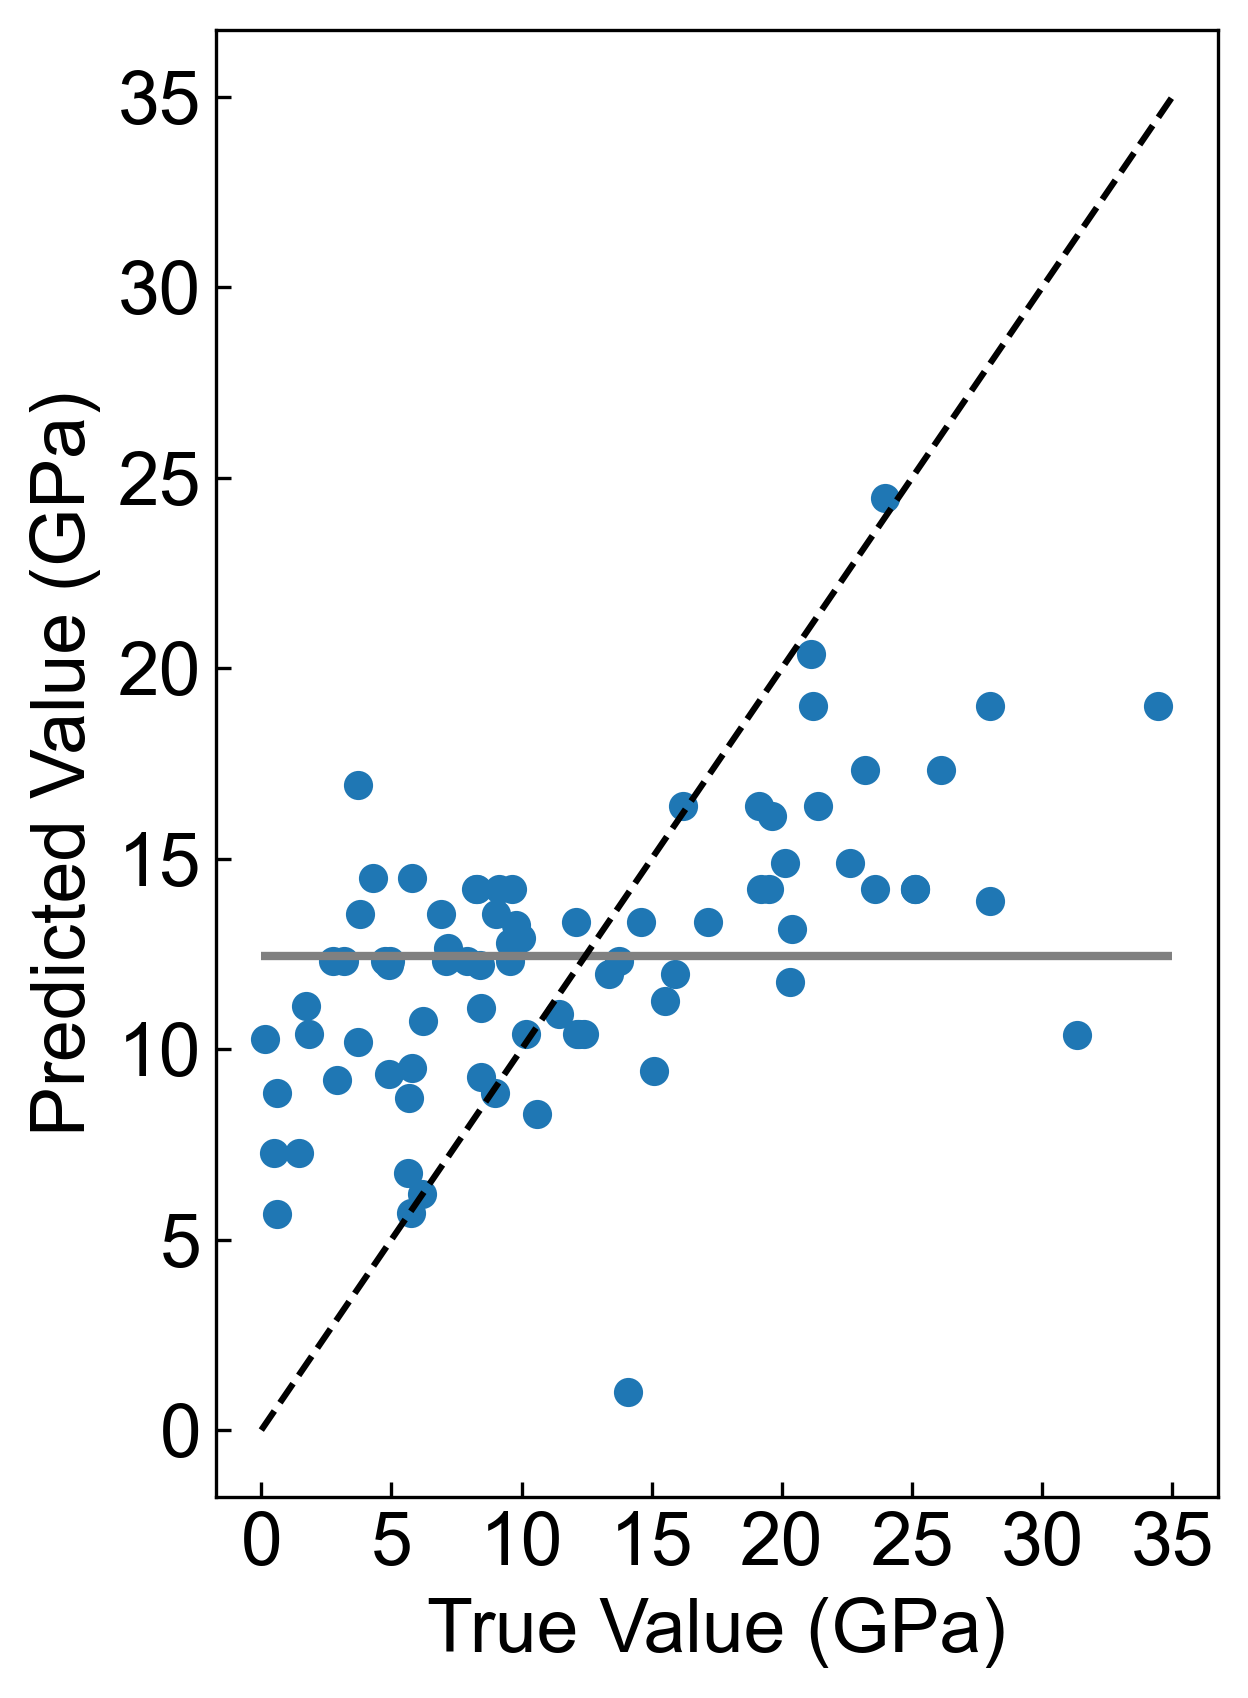

In [8]:
plt.figure(figsize=(4.5,6),dpi=300)
plt.rcParams['font.size']=18
plt.rcParams['font.family']='Arial'
plt.hlines(np.mean(y_pred), 0, 35, colors='gray', linewidth=2)
plt.scatter(y_test, y_pred)
plt.plot([0,35],[0,35], linestyle='dashed',c='k')
plt.xlabel('True Value (GPa)')
plt.ylabel('Predicted Value (GPa)')
plt.xticks([i*5 for i in range(8)])
plt.tight_layout()

print(lasso_optimal.score(X_test, y_test))

## Hyperparameter optimization and the number of non-zero coefficients in the LASSO regression

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


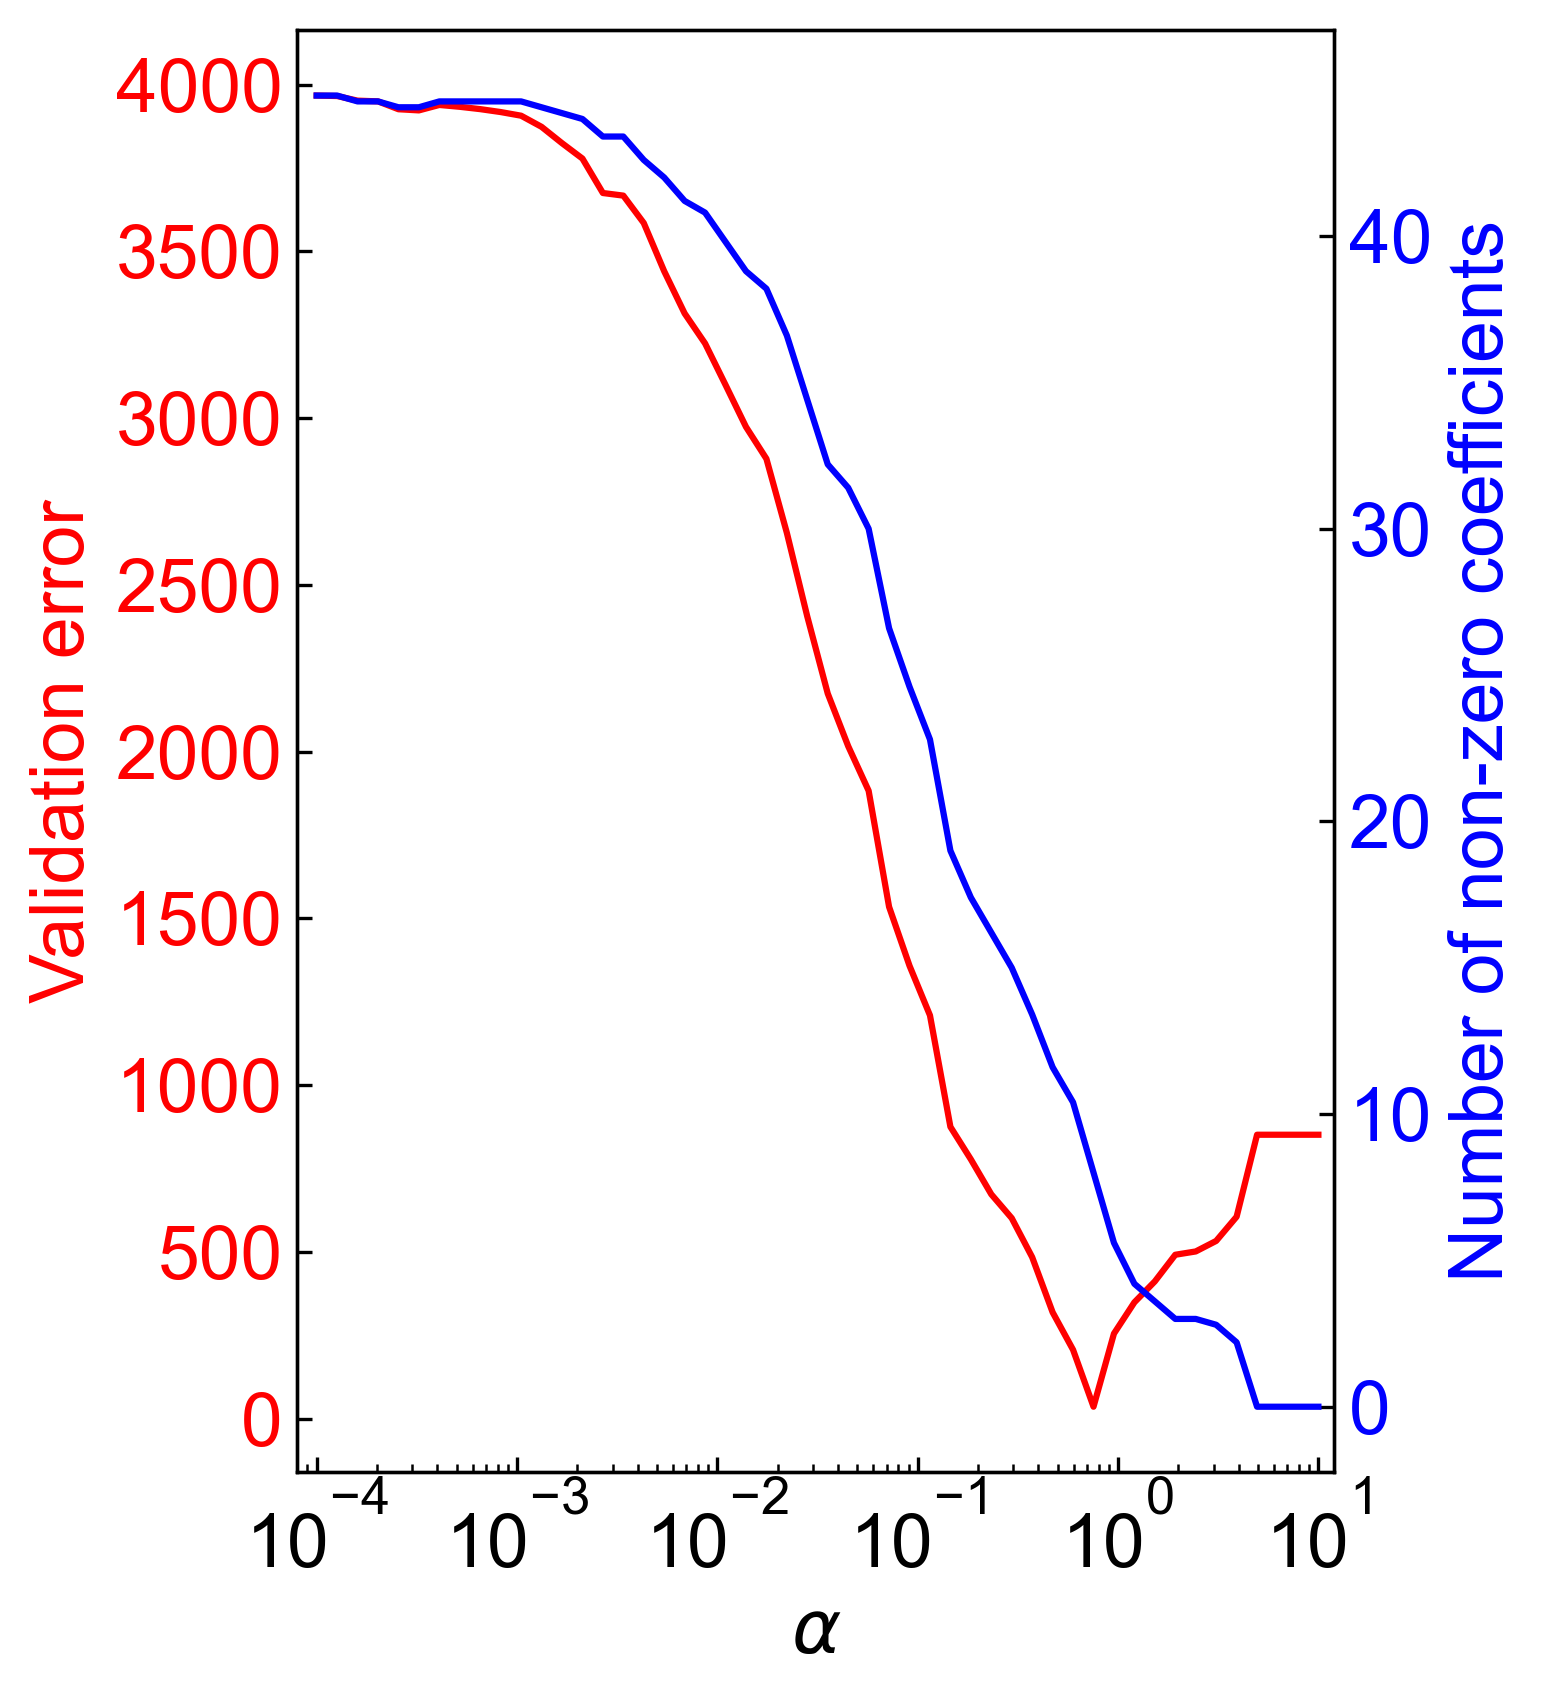

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import LogLocator, NullFormatter

fig, ax1 = plt.subplots(figsize=(5.5, 6), dpi=300)
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'

# Y-axis on the left
ax1.plot(alphas, alpha_error_scores, c='r')
ax1.set_xscale('log')
ax1.set_xlabel("$\\it{\\alpha}$")
ax1.set_ylabel("Validation error", color='r')
ax1.tick_params(axis='y', labelcolor='r')
ax1.set_xlim([0.8e-4, 1.2e1])

# Adjustment of major and minor ticks
ax1.xaxis.set_major_locator(LogLocator(base=10.0, numticks=7))  # 主目盛りとして10^-4, 10^-3, 10^-2, 10^-1, 10^0, 10^1
ax1.xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(1, 10) * 0.1, numticks=60))  # 副目盛りとしてそれ以外を表示
ax1.xaxis.set_minor_formatter(NullFormatter())  # 副目盛りのラベルは表示しない

# Y-axis on the right
ax2 = ax1.twinx()
ax2.plot(alphas, alpha_n_coef_scores, c='b')
ax2.set_ylabel("Number of non-zero coefficients", color='b')
ax2.tick_params(axis='y', labelcolor='b')

plt.tight_layout()
plt.show()



## Regression coefficients whose variables were retained by LASSO regression

The number of non-zero coefficients:  7


<Figure size 3000x2400 with 0 Axes>

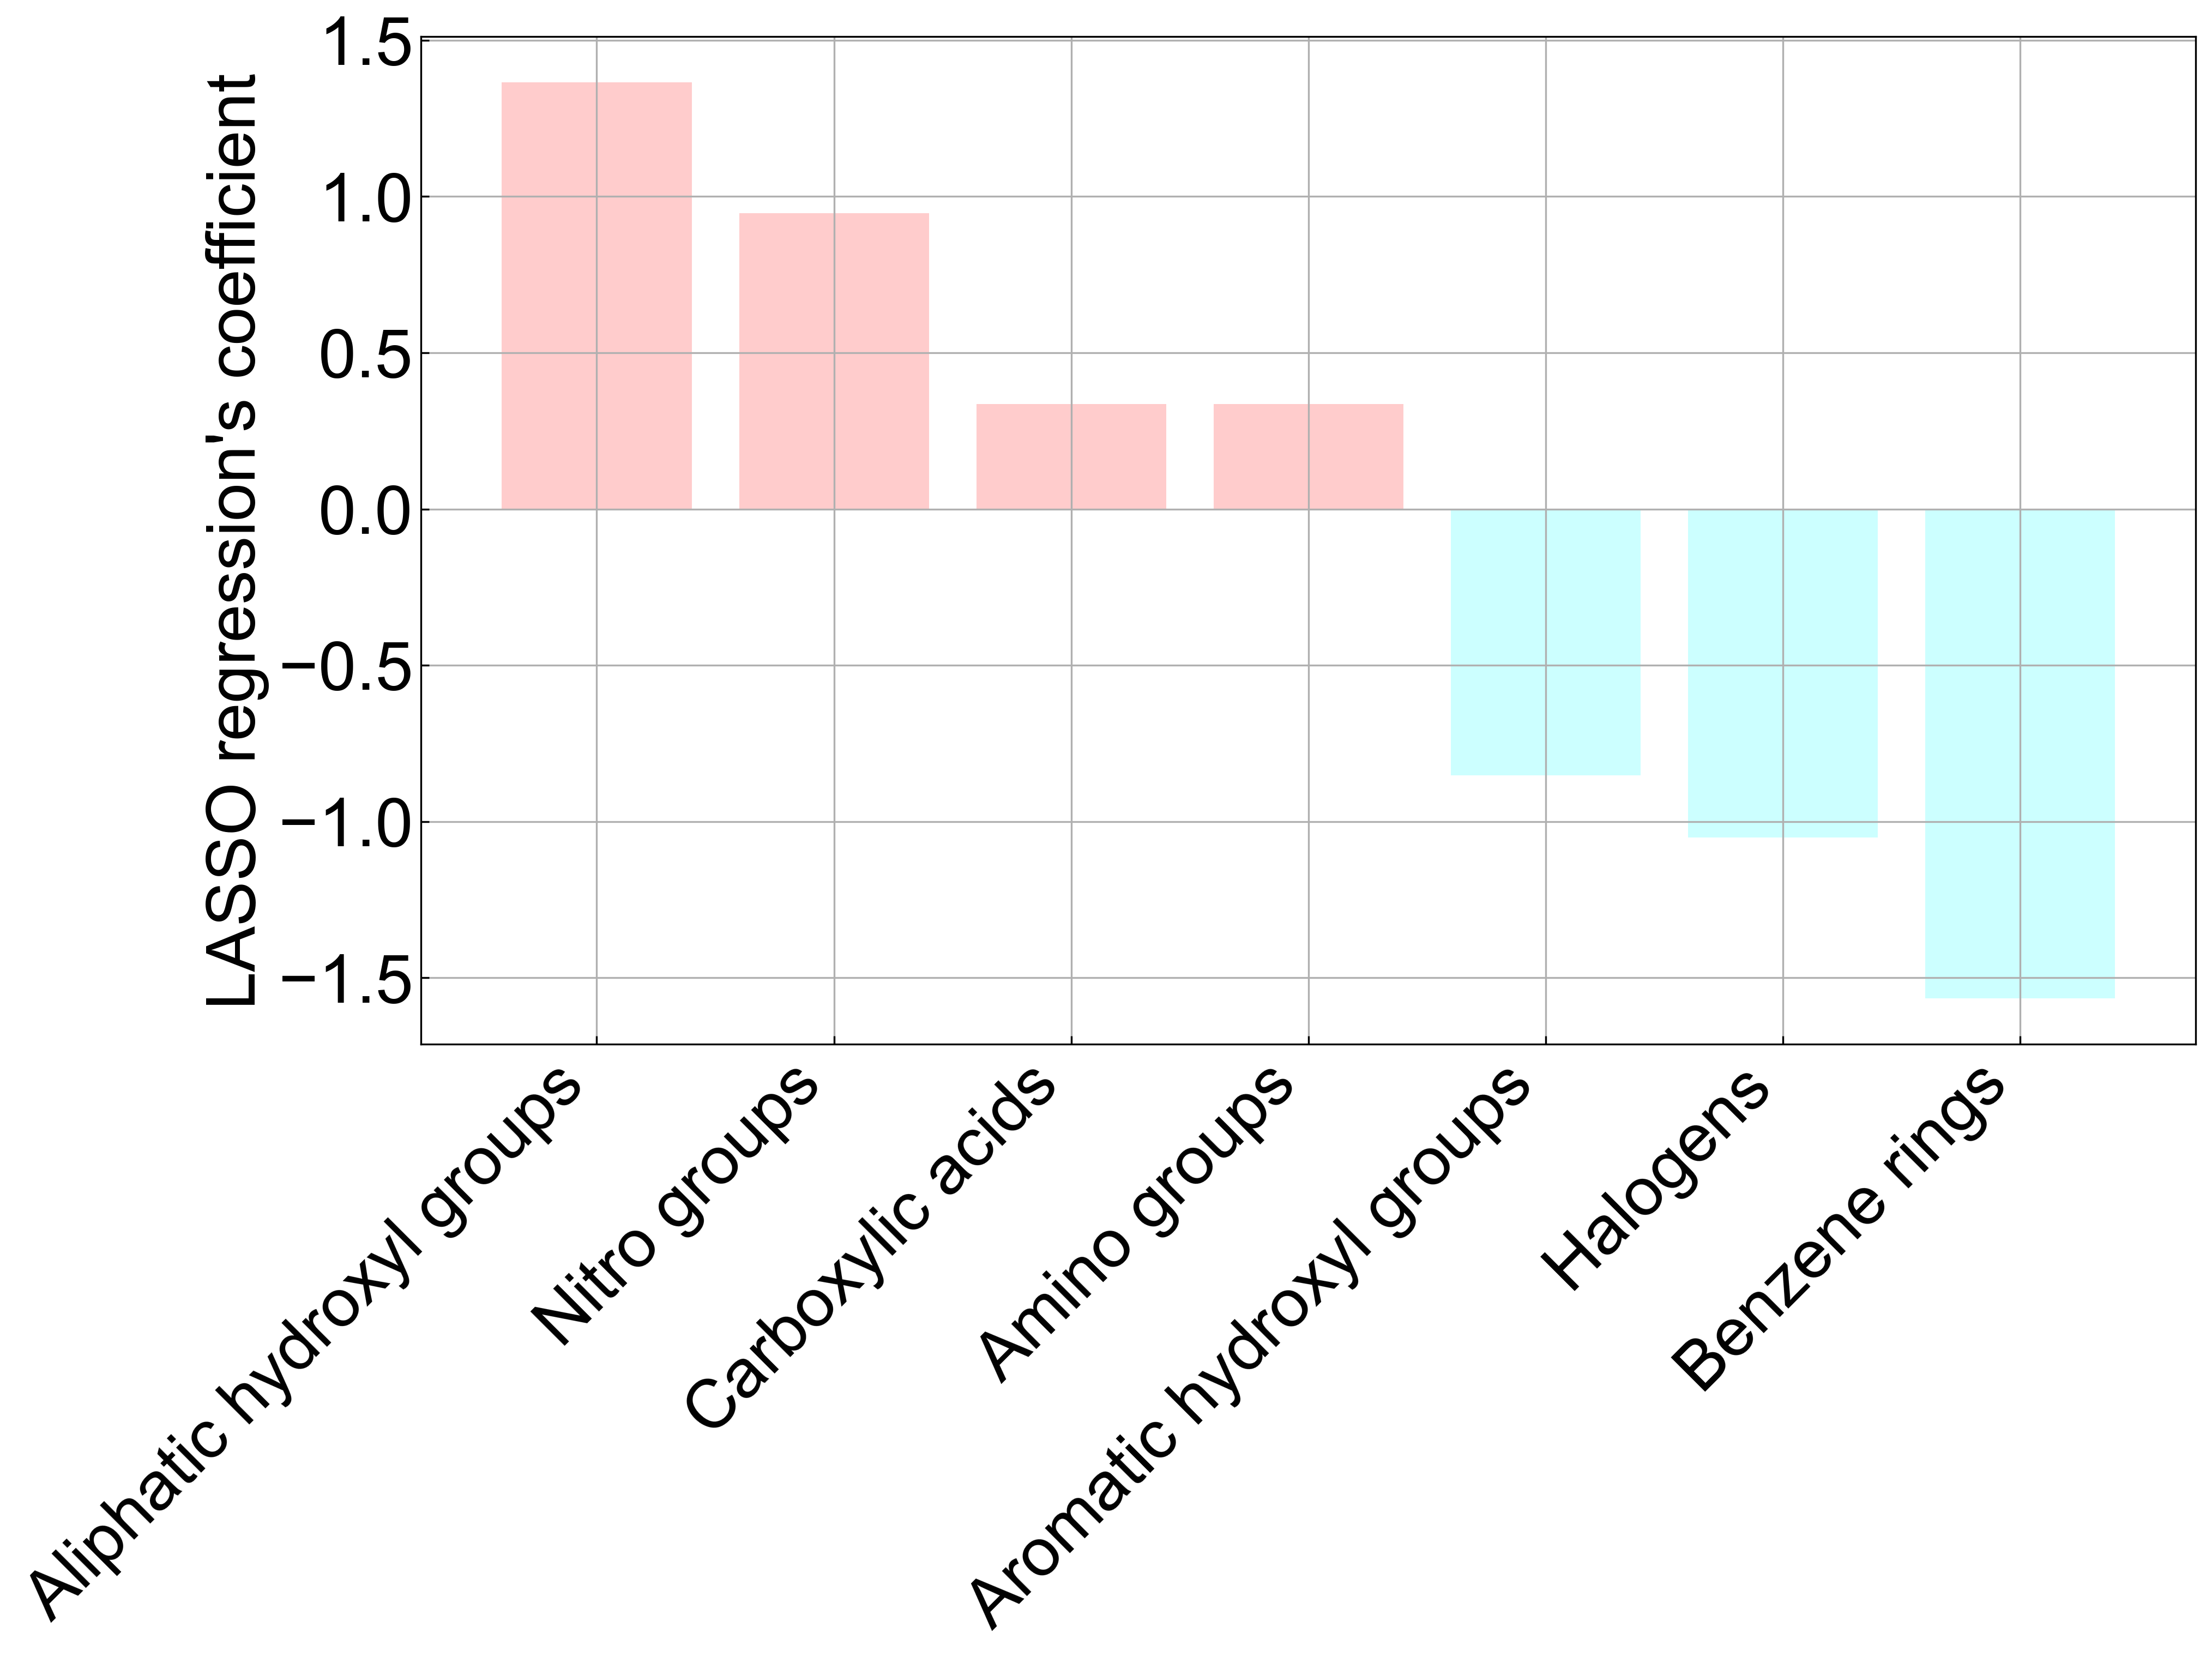

In [10]:
df_coef = pd.DataFrame({'label': list(df_nfrag_reduced.columns), 'coef': list(lasso_optimal.coef_)})
df_coef_extract = df_coef[df_coef['coef']!=0]
coefs = lasso_optimal.coef_
print('The number of non-zero coefficients: ', coefs[coefs != 0].shape[0])
df_coef_extract_sorted = df_coef_extract.sort_values(by='coef', ascending=False)
df_coef_extract_sorted

# Sorting of LASSO regression coefficients
label = ["Aliphatic hydroxyl groups", "Nitro groups", "Carboxylic acids", "Amino groups", "Aromatic hydroxyl groups", "Halogens", "Benzene rings"]

# Graph creation
plt.figure(figsize=(10,8),dpi=300)
plt.rcParams["font.size"] = 26

plt.figure(figsize=(14,8),dpi=300)
plt.rcParams["font.size"] = 30
plt.rcParams["font.family"] = "Arial"

# Visualization of sorted coefficients as a bar graph
plt.bar(label, df_coef_extract_sorted["coef"], align='center', alpha=0.2, color=['cyan' if val < 0 else 'red' for val in df_coef_extract_sorted["coef"]])

# Layout adjustment
plt.ylabel("LASSO regression's coefficient")
plt.xticks(rotation=45, ha='right')
plt.grid()

# Graph visualization
plt.show()

## Regression coefficients under different alpha

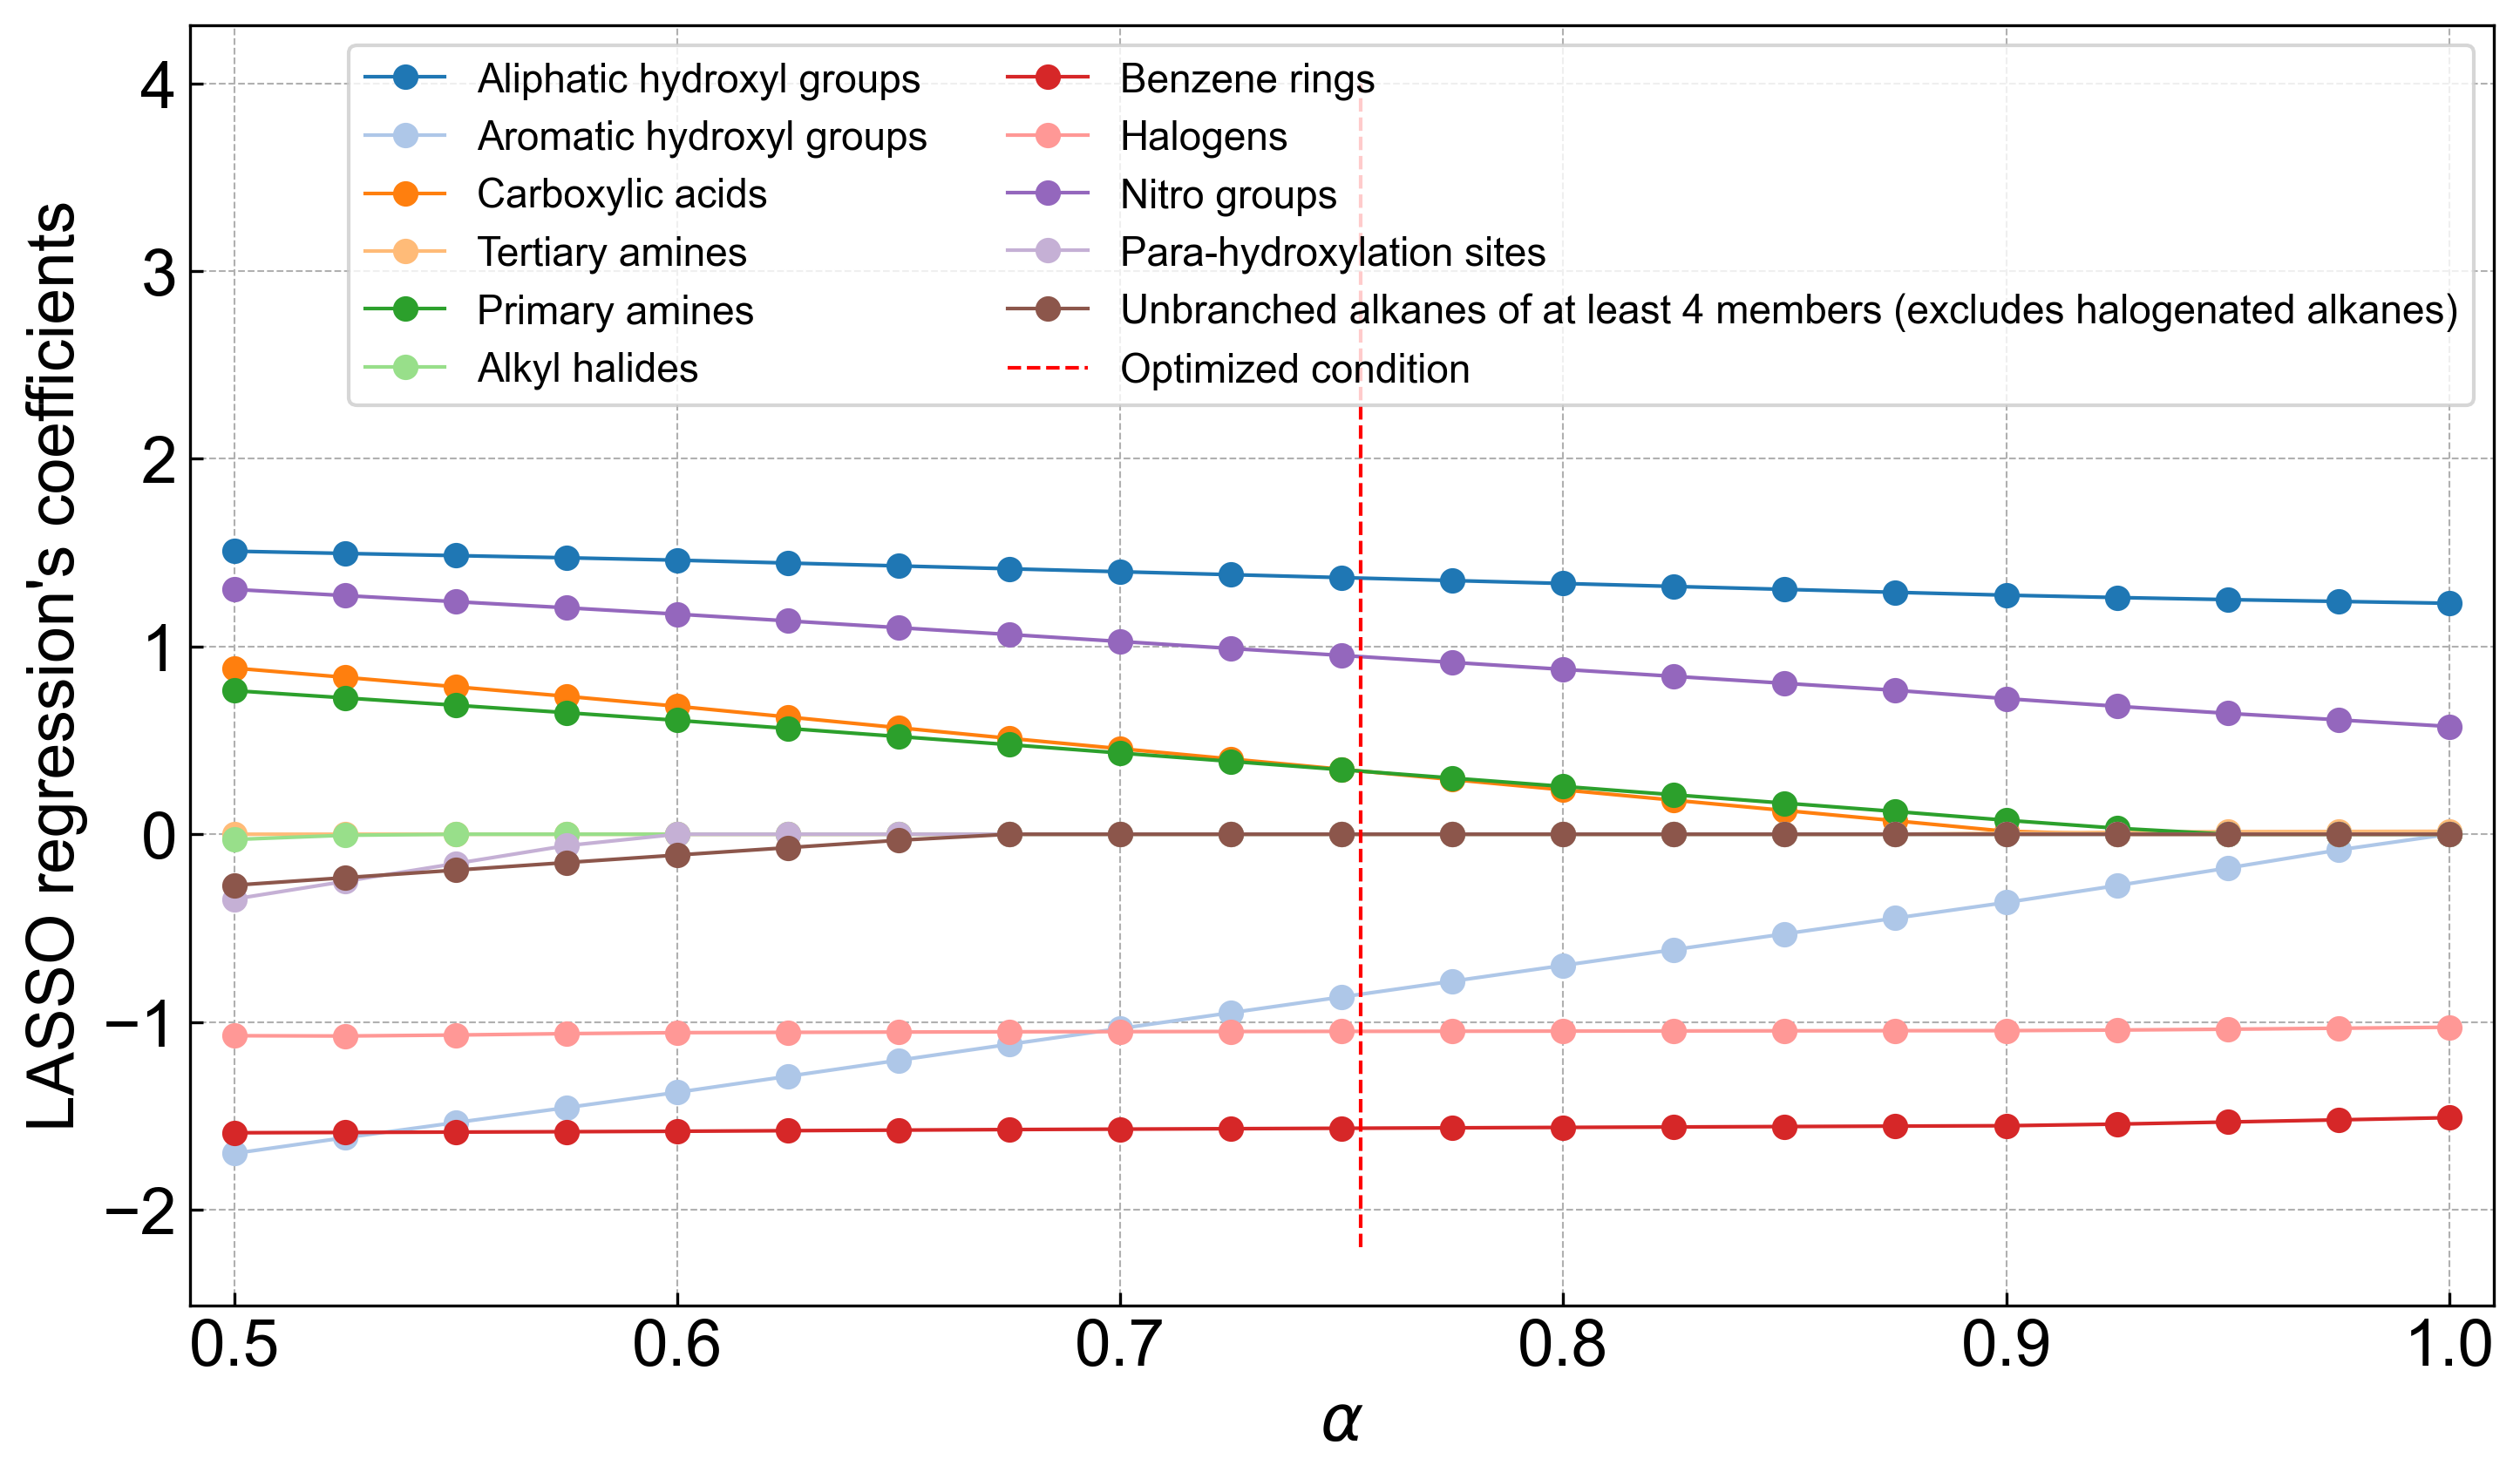

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Setting of alpha parameters
alphas = np.linspace(0.5, 1.0, 21)
alphas2 = alphas[(0.5 <= alphas) & (alphas <= 1.0)]

# Coefficients for each functional group
coefficients_dict = {}
all_selected_labels = set()

# Functional groups with nonzero coefficients across all alpha values
for alpha in alphas2:
    lasso_optimal = Lasso(alpha=alpha)
    lasso_optimal.fit(X_train, y_train)

    coefs = lasso_optimal.coef_
    selected_labels = np.array(df_nfrag_reduced.columns)[coefs != 0]
    all_selected_labels.update(selected_labels)

    # Coefficients of the selected functional groups
    for label in all_selected_labels:
        if label not in coefficients_dict:
            coefficients_dict[label] = [0] * len(alphas2)
        # Setting missing functional group coefficients to zero
        coef_value = coefs[list(df_nfrag_reduced.columns).index(label)] if label in df_nfrag_reduced.columns else 0
        coefficients_dict[label][alphas2.tolist().index(alpha)] = coef_value


colors = plt.cm.tab20(np.linspace(0, 1, 20))

# Graph creation
plt.figure(figsize=(10, 6), dpi=300)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 18

# Sorting of legend labels and coefficients
sorted_labels = sorted(coefficients_dict.items(), key=lambda x: int(x[0].split(".")[0]))

# Plotting with different colors assigned to each functional group
for idx, (label, coef_values) in enumerate(sorted_labels):
    if any(c != 0 for c in coef_values):
        color = colors[idx % 20]
        label_name = label.split(".")[1].strip().capitalize()
        plt.plot(alphas2, coef_values, label=label_name, marker='o', linestyle='-', linewidth=1, color=color)

plt.vlines(0.7543120063, -2.2, 4, colors='red', linestyle='dashed', linewidth=1, label="Optimized condition")

# Axis labels and title
plt.xlabel("$\\it{\\alpha}$", fontsize=18)
plt.ylabel("LASSO regression's coefficients", fontsize=18)
plt.xlim([min(alphas2)-0.01, 1.0+0.01])

plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=2, fontsize=11)  # 凡例を複数列に分けることで調整
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Graph creation
plt.tight_layout()
plt.show()